In [46]:
def missing_dates(df):
    # Convert the date column to datetime type if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Get the first and last date
    first_date = df['Date'].min()
    last_date = df['Date'].max()

    # Generate a sequence of all dates between the first and last date
    all_dates = pd.date_range(start=first_date, end=last_date, freq='D')

    # Find the missing dates
    missing_dates = all_dates[~all_dates.isin(df['Date'])]

    if len(missing_dates) == 0:
        return False
    else:
        return True
    


In [47]:
def Fill_Data(Demand):

    Demand.set_index('Date', inplace=True)
    # Resample the dataframe to fill in any missing dates with NaN values
    Demand = Demand.resample('D').asfreq()

    Demand['Order_Demand'] = Demand['Order_Demand'].interpolate(method='linear')

    return Demand

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Load the data
Demand_raw = pd.read_csv("./Demand_Data.csv")
Demand_raw['Date'] = pd.to_datetime(Demand_raw['Date'])
Demand = Demand_raw.groupby('Date')['Order_Demand'].sum().reset_index()

# Preprocess the data
if missing_dates(Demand):
    Processed_Demand = Fill_Data(Demand)
else:
    Processed_Demand = Demand

Processed_Demand['Order_Demand'] = Processed_Demand['Order_Demand'] / 1000000


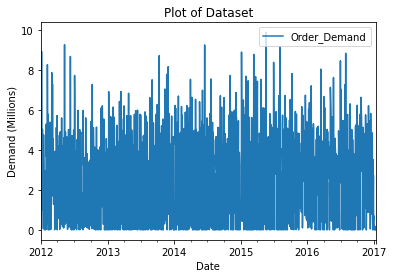

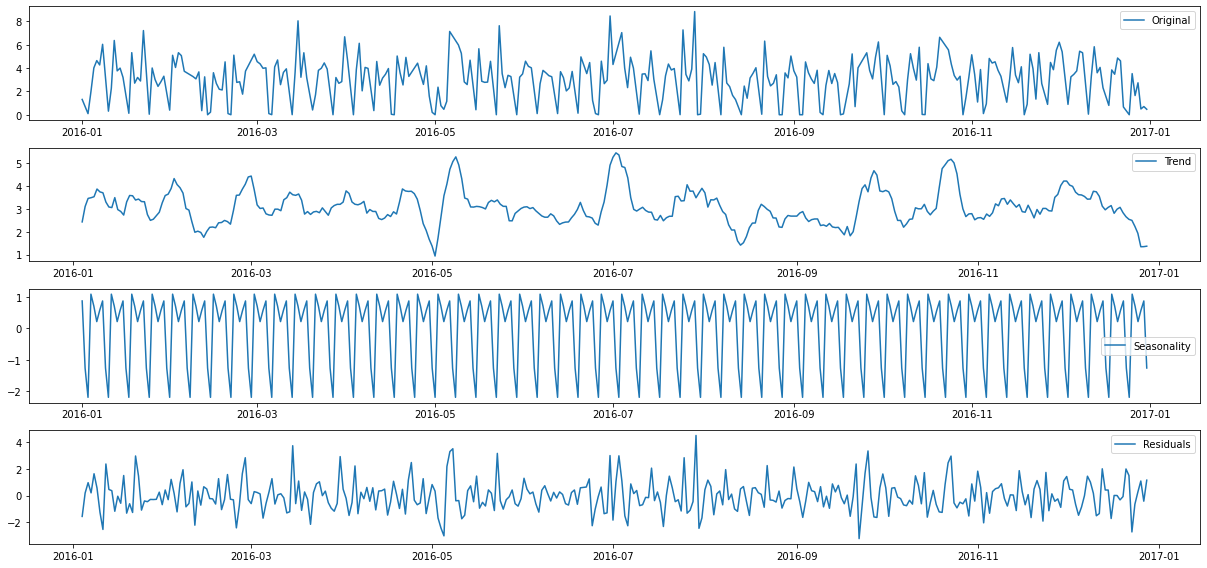

In [49]:

Processed_Demand.plot()
plt.xlabel('Date')
plt.ylabel('Demand (Millions)')
plt.title('Plot of Dataset')
plt.show()

year = 2016  # Specify the year you want to select

Processed_Demand = Processed_Demand[Processed_Demand.index.year == year]

result = seasonal_decompose(Processed_Demand['Order_Demand'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(17, 8))
plt.subplot(411)
plt.plot(Processed_Demand.index, Processed_Demand['Order_Demand'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(Processed_Demand.index, result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(Processed_Demand.index, result.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(Processed_Demand.index, result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ADF Statistic: -5.087593017466591
p-value: 1.4847066369559808e-05
Critical Values:
1%: -3.44911857009962
5%: -2.8698097654570507
10%: -2.5711757061225153


C:\Users\mmmap\AppData\Local\Temp\ipykernel_4920\1869286394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Processed_Demand['Order_Demand'] = pd.to_numeric(Processed_Demand['Order_Demand'], errors='coerce')  # Convert 'Value' column to numeric if needed


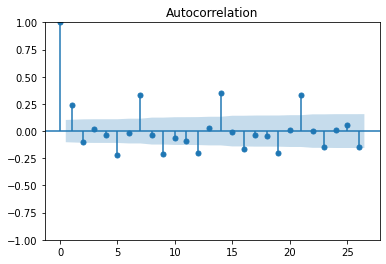

In [50]:
Processed_Demand['Order_Demand'] = pd.to_numeric(Processed_Demand['Order_Demand'], errors='coerce')  # Convert 'Value' column to numeric if needed
#Processed_Demand.set_index('Date', inplace=True)

# Perform ADF test for stationarity
adf_result = adfuller(Processed_Demand['Order_Demand'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'{key}: {value}')

# Plot ACF and PACF
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(Processed_Demand['Order_Demand'])#, ax=ax1)
#plot_pacf(Processed_Demand['Order_Demand'], ax=ax2)
plt.show()